In [89]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from matplotlib.patches import Circle, PathPatch
from sklearn.cluster import KMeans

In [33]:
def throw_dart(lim_x, lim_y):
    pt_x = np.random.uniform(0, lim_x)
    pt_y = np.random.uniform(0, lim_y)

    return [pt_x, pt_y]

In [34]:
def get_dart_clr(uni_prob, cr_prob, cr, cr_li):
    if((uni_prob <= cr_prob)):
        _color = cr
    else:
        cr_li.remove(cr)
        cr = np.random.choice(cr_li)
    return cr

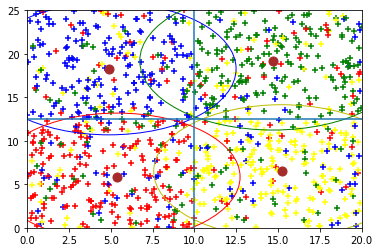

In [97]:
pt_li = [] 
cr_li = []
f, ax = plt.subplots(1)
ax.axvline(10); ax.axhline(12.5)
ax.set_xlim([0,20]); ax.set_ylim([0,25])
darts = range(1000)
for dart in darts:
    crs = ['red', 'blue', 'green', 'yellow']
    prob = np.random.uniform()
    pt = throw_dart(20, 25)
    
    if((pt[0] <= 10) & (pt[1] <= 12.5)):
        
        c = get_dart_clr(prob, 0.7, 'red', crs)
        
    elif((pt[0] <= 10) & (pt[1] >= 12.5)):
        
        c = get_dart_clr(prob, 0.7, 'blue', crs)
        
    elif((pt[0] > 10) & (pt[1] >= 12.5)):
        
        c = get_dart_clr(prob, 0.7, 'green', crs)

    else:
        c = get_dart_clr(prob, 0.7, 'yellow', crs)

        
    pt_li.append(pt) 
    cr_li.append(c)
      
ax.scatter(np.array(pt_li)[:, 0], np.array(pt_li)[:, 1], marker='+', c = cr_li)

### Uncomment code below after running all cells below!

# ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='brown', s=82)
# art = Circle(clusters_centroids[0],clusters_radii[0], edgecolor='y',fill=False)
# ax.add_patch(art)
# art = Circle(clusters_centroids[1],clusters_radii[1], edgecolor='b',fill=False)
# ax.add_patch(art)
# art = Circle(clusters_centroids[2],clusters_radii[2], edgecolor='r',fill=False)
# ax.add_patch(art)
# art = Circle(clusters_centroids[3],clusters_radii[3], edgecolor='g',fill=False)
# ax.add_patch(art)
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [63]:
pred_target = kmeans.fit_predict(pt_li)

In [86]:
clusters_centroids=dict()
clusters_radii= dict()

'''looping over clusters and calculate Euclidian distance of 
each point within that cluster from its centroid and 
pick the maximum which is the radius of that cluster'''

for cluster in list(set([0, 1, 2, 3])):

    clusters_centroids[cluster] = list(zip(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1]))[cluster]
    clusters_radii[cluster] = max( [np.linalg.norm(np.array(i)-clusters_centroids[cluster]) for i in zip(np.array(pt_li)[pred_target == cluster, 0], np.array(pt_li)[pred_target == cluster, 1])])
    